In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

# Ensure NLTK 'punkt' tokenizer and stopwords are downloaded
nltk.download("punkt_tab")
nltk.download("stopwords")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/azureuser/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/azureuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
file_path = "/home/azureuser/cloudfiles/code/Users/oskar.wolf/nlp_air_france_reviews/data/raw/airfrance_tripadvisor_reviews.csv"
df = pd.read_csv(file_path)

df.head()

,rating,title,text,publishedDate
0,1,WORST AIRLINE,I travel a lot - and I travel often. Last week...,2024-11-13
1,1,Terrible experience with Airfrance,"This review is regarding flight AF185, we book...",2024-11-13
2,1,Extremely Disappointing Experience with Air Fr...,I recently flew with Air France on flight #185...,2024-11-12
3,1,Horrible,Wow!!! What a horrible experience!! I've alway...,2024-11-11
4,1,The Worst Flight Experience I’ve Ever Had,I spent a fantastic 10-day vacation in Hong Ko...,2024-11-11


In [50]:
print("Missing Vlaues per Column: \n", df.isnull().sum())

Missing Vlaues per Column: 
 rating           0
title            0
text             0
publishedDate    0
dtype: int64


In [51]:
print("/nDataset Info: \n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rating         2560 non-null   int64 
 1   title          2560 non-null   object
 2   text           2560 non-null   object
 3   publishedDate  2560 non-null   object
dtypes: int64(1), object(3)
memory usage: 80.1+ KB
/nDataset Info: 
 None


In [52]:
print("\nDuplicate Rows: ", df.duplicated().sum())


Duplicate Rows:  0


In [53]:
df.describe()

,rating
count,2560.000000
mean,3.126172
std,1.530240
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,5.000000


In [54]:
def classify_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"


df["sentiment"] = df["rating"].apply(classify_sentiment)

print("\nSentiment Distribution: \n", df["sentiment"].value_counts())


Sentiment Distribution: 
 sentiment
Positive    1231
Negative     914
Neutral      415
Name: count, dtype: int64


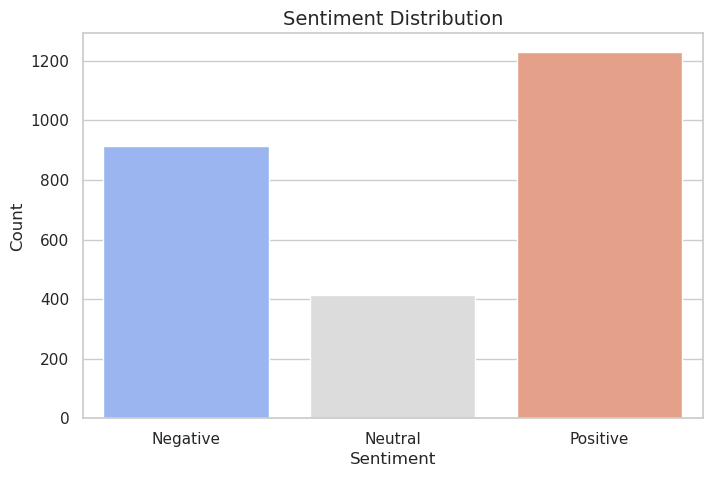

In [55]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.countplot(
    x=df["sentiment"], palette="coolwarm", order=["Negative", "Neutral", "Positive"]
)
plt.title("Sentiment Distribution", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

In [ ]:
# Ensure the 'text' and 'title' columns exist in the DataFrame
if "text" in df.columns and "title" in df.columns:
    all_text = " ".join(df["text"])
    all_title = " ".join(df["title"])
else:
    print("Error: 'text' or 'title' column not found in DataFrame")

In [ ]:
if "text" in df.columns and "title" in df.columns:
    tokens_text = word_tokenize(all_text.lower())
    tokens_title = word_tokenize(all_title.lower())

    # Remove stop words
    stop_words = set(stopwords.words("english"))
    filtered_tokens_text = [
        word for word in tokens_text if word.isalnum() and word not in stop_words
    ]
    filtered_tokens_title = [
        word for word in tokens_title if word.isalnum() and word not in stop_words
    ]

    word_counts_text = Counter(filtered_tokens_text)
    word_counts_title = Counter(filtered_tokens_title)

    print("Most Common Words in Text: \n", word_counts_text.most_common(20))
    print("Most Common Words in Title: \n", word_counts_title.most_common(20))

Most Common Words in Text: 
 [('flight', 3904), ('air', 2616), ('france', 2504), ('service', 1378), ('paris', 1164), ('time', 1132), ('food', 1103), ('good', 1093), ('us', 982), ('seats', 930), ('would', 910), ('one', 802), ('get', 748), ('airline', 722), ('seat', 714), ('staff', 711), ('airport', 699), ('plane', 681), ('class', 671), ('luggage', 656)]
Most Common Words in Title: 
 [('flight', 405), ('service', 347), ('air', 312), ('france', 302), ('good', 238), ('great', 187), ('experience', 150), ('airline', 145), ('worst', 105), ('class', 96), ('business', 94), ('paris', 88), ('food', 86), ('economy', 79), ('excellent', 78), ('customer', 72), ('ever', 65), ('best', 65), ('poor', 62), ('flights', 60)]


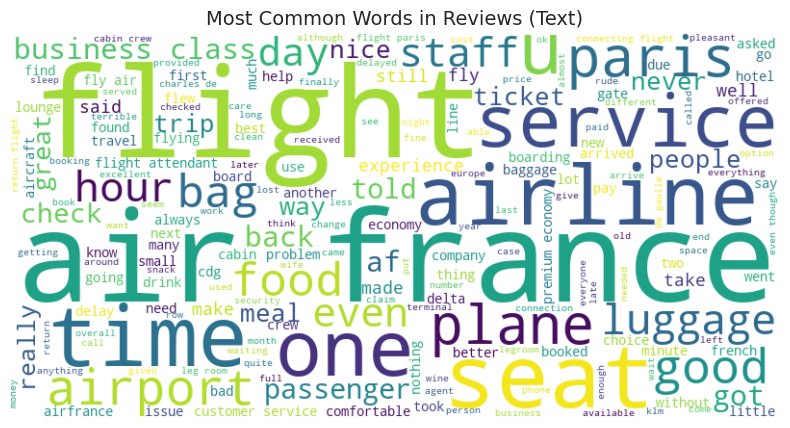

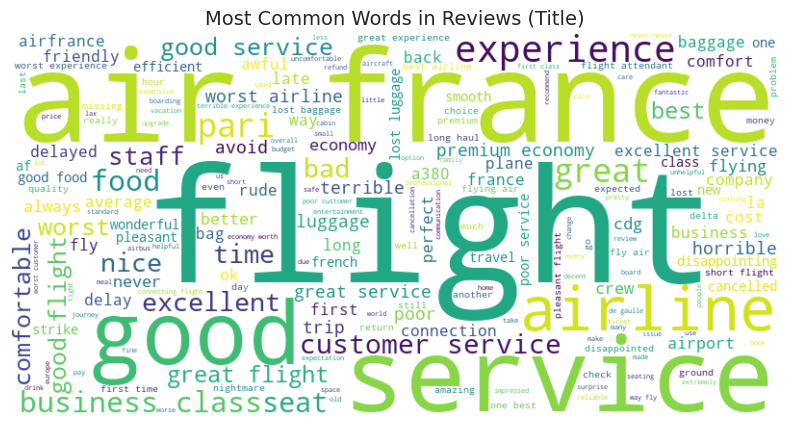

In [ ]:
if "text" in df.columns and "title" in df.columns:
    # Generate word clouds
    wordcloud_text = WordCloud(
        width=800, height=400, background_color="white"
    ).generate(" ".join(filtered_tokens_text))
    wordcloud_title = WordCloud(
        width=800, height=400, background_color="white"
    ).generate(" ".join(filtered_tokens_title))

    # Display word cloud for text
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_text, interpolation="bilinear")
    plt.axis("off")
    plt.title("Most Common Words in Reviews (Text)", fontsize=14)
    plt.show()

    # Display word cloud for title
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_title, interpolation="bilinear")
    plt.axis("off")
    plt.title("Most Common Words in Reviews (Title)", fontsize=14)
    plt.show()

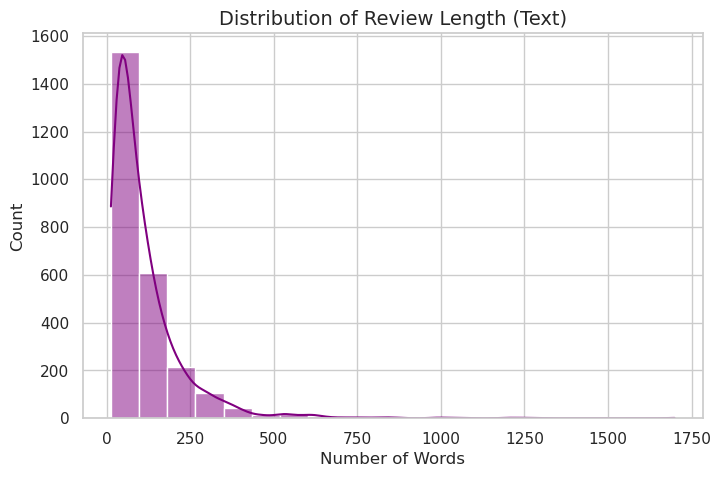

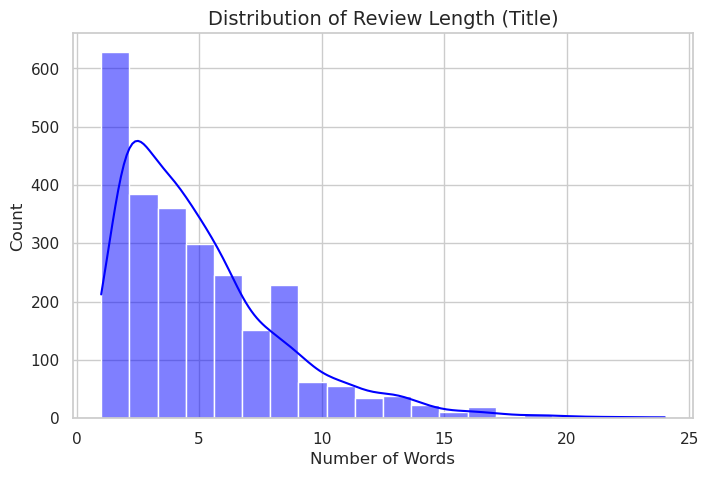

In [ ]:
if "text" in df.columns and "title" in df.columns:
    # Create distribution of review length for text
    df["review_length_text"] = df["text"].astype(str).apply(lambda x: len(x.split()))
    plt.figure(figsize=(8, 5))
    sns.histplot(df["review_length_text"], kde=True, color="purple", bins=20)
    plt.title("Distribution of Review Length (Text)", fontsize=14)
    plt.xlabel("Number of Words", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.show()

    # Create distribution of review length for title
    df["review_length_title"] = df["title"].astype(str).apply(lambda x: len(x.split()))
    plt.figure(figsize=(8, 5))
    sns.histplot(df["review_length_title"], kde=True, color="blue", bins=20)
    plt.title("Distribution of Review Length (Title)", fontsize=14)
    plt.xlabel("Number of Words", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.show()

In [61]:
from textblob import TextBlob

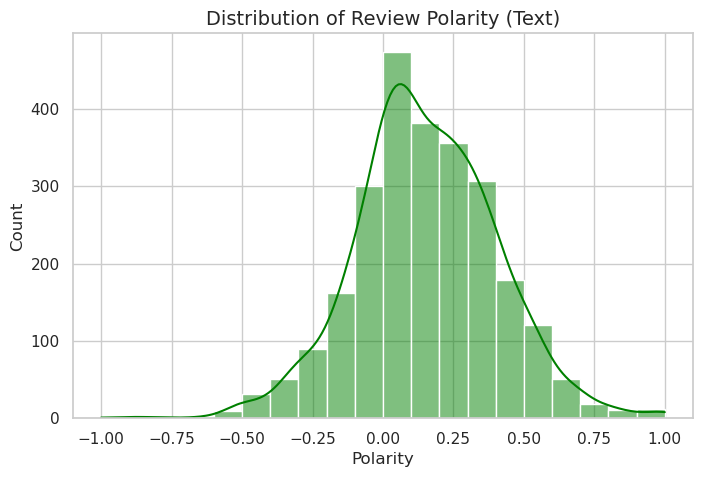

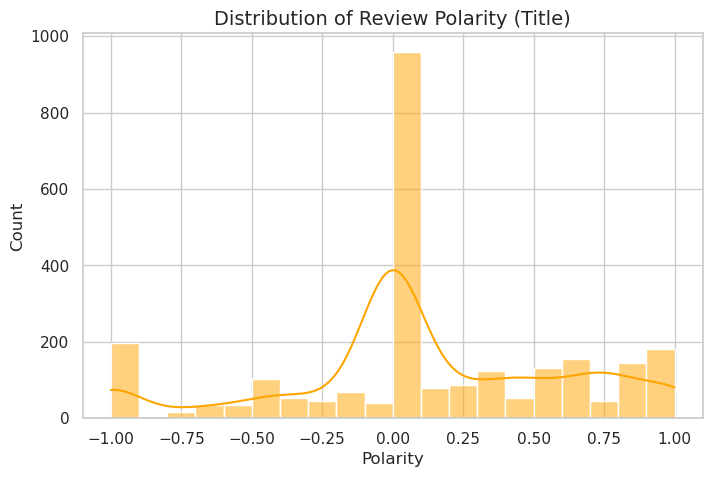

In [ ]:
df["polarity_text"] = (
    df["text"].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
)

df["polarity_title"] = (
    df["title"].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
)

# Plot polarity distribution for text
plt.figure(figsize=(8, 5))
sns.histplot(df["polarity_text"], kde=True, color="green", bins=20)
plt.title("Distribution of Review Polarity (Text)", fontsize=14)
plt.xlabel("Polarity", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# Plot polarity distribution for title
plt.figure(figsize=(8, 5))
sns.histplot(df["polarity_title"], kde=True, color="orange", bins=20)
plt.title("Distribution of Review Polarity (Title)", fontsize=14)
plt.xlabel("Polarity", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

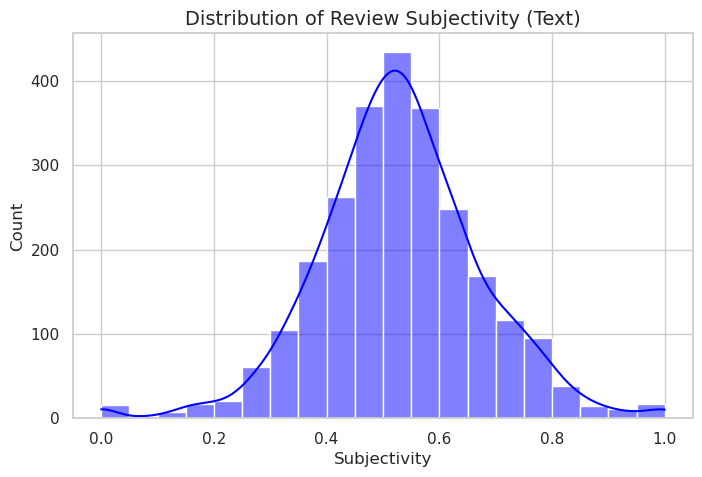

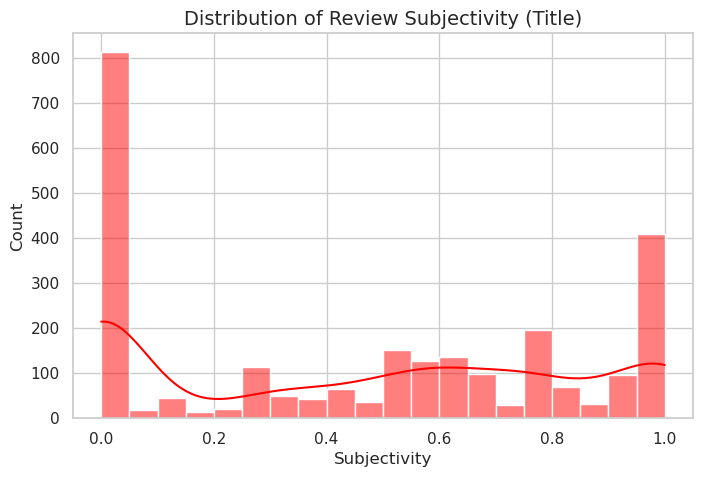

In [ ]:
df["subjectivity_text"] = (
    df["text"].astype(str).apply(lambda x: TextBlob(x).sentiment.subjectivity)
)

df["subjectivity_title"] = (
    df["title"].astype(str).apply(lambda x: TextBlob(x).sentiment.subjectivity)
)

# Plot subjectivity distribution for text
plt.figure(figsize=(8, 5))
sns.histplot(df["subjectivity_text"], kde=True, color="blue", bins=20)
plt.title("Distribution of Review Subjectivity (Text)", fontsize=14)
plt.xlabel("Subjectivity", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# Plot subjectivity distribution for title
plt.figure(figsize=(8, 5))
sns.histplot(df["subjectivity_title"], kde=True, color="red", bins=20)
plt.title("Distribution of Review Subjectivity (Title)", fontsize=14)
plt.xlabel("Subjectivity", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

In [ ]:
# Basic statistics for text column
text_lengths = df["text"].astype(str).apply(lambda x: len(x.split()))
print("Text Column Statistics:")
print(f"Number of Reviews: {len(text_lengths)}")
print(f"Average Length: {text_lengths.mean()}")
print(f"Standard Deviation: {text_lengths.std()}")
print(f"Minimum Length: {text_lengths.min()}")
print(f"Maximum Length: {text_lengths.max()}")

Text Column Statistics:
Number of Reviews: 2560
Average Length: 112.749609375
Standard Deviation: 119.10908451135789
Minimum Length: 13
Maximum Length: 1699


In [ ]:
# Basic statistics for title column
title_lengths = df["title"].astype(str).apply(lambda x: len(x.split()))
print("\nTitle Column Statistics:")
print(f"Number of Reviews: {len(title_lengths)}")
print(f"Average Length: {title_lengths.mean()}")
print(f"Standard Deviation: {title_lengths.std()}")
print(f"Minimum Length: {title_lengths.min()}")
print(f"Maximum Length: {title_lengths.max()}")


Title Column Statistics:
Number of Reviews: 2560
Average Length: 5.07578125
Standard Deviation: 3.411431626671488
Minimum Length: 1
Maximum Length: 24


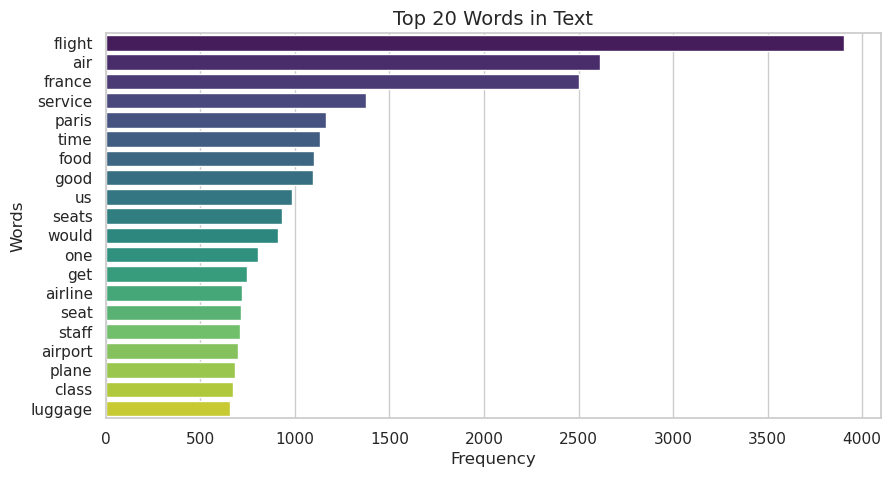

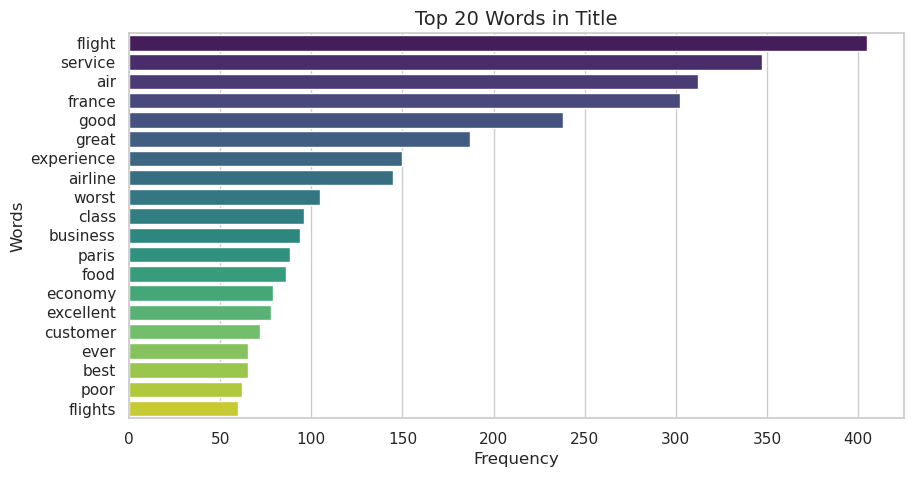

In [ ]:
from collections import Counter

# Plot frequency distribution of top 20 words in text
word_counts_text = Counter(filtered_tokens_text)
common_words_text = word_counts_text.most_common(20)
words, counts = zip(*common_words_text)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(counts), y=list(words), palette="viridis")
plt.title("Top 20 Words in Text", fontsize=14)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Words", fontsize=12)
plt.show()

# Plot frequency distribution of top 20 words in title
word_counts_title = Counter(filtered_tokens_title)
common_words_title = word_counts_title.most_common(20)
words, counts = zip(*common_words_title)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(counts), y=list(words), palette="viridis")
plt.title("Top 20 Words in Title", fontsize=14)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Words", fontsize=12)
plt.show()

In [ ]:
from nltk import ngrams


# Function to get n-grams
def get_ngrams(tokens, n):
    return [" ".join(grams) for grams in ngrams(tokens, n)]


# Get bigrams and trigrams for text
bigrams_text = get_ngrams(filtered_tokens_text, 2)
trigrams_text = get_ngrams(filtered_tokens_text, 3)

# Get bigrams and trigrams for title
bigrams_title = get_ngrams(filtered_tokens_title, 2)
trigrams_title = get_ngrams(filtered_tokens_title, 3)


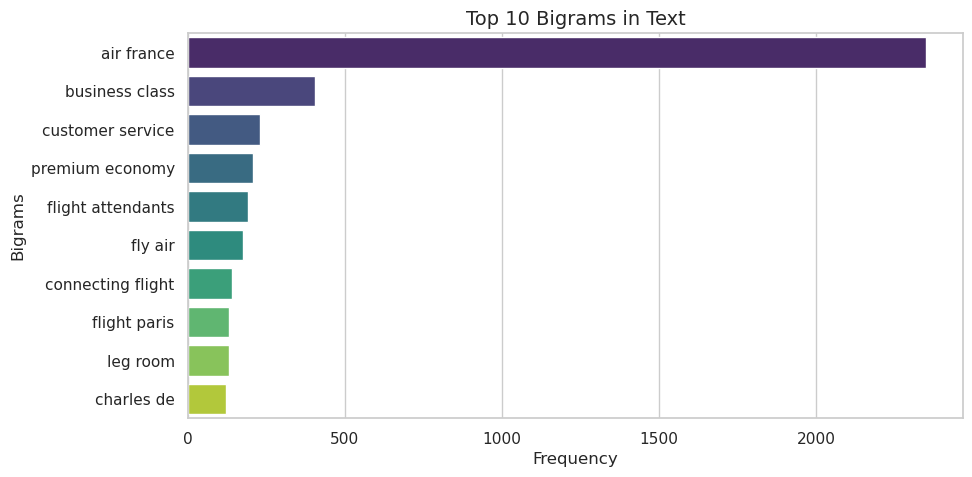

In [ ]:
# Plot top 10 bigrams in text
bigram_counts_text = Counter(bigrams_text).most_common(10)
bigrams, counts = zip(*bigram_counts_text)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(counts), y=list(bigrams), palette="viridis")
plt.title("Top 10 Bigrams in Text", fontsize=14)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Bigrams", fontsize=12)
plt.show()


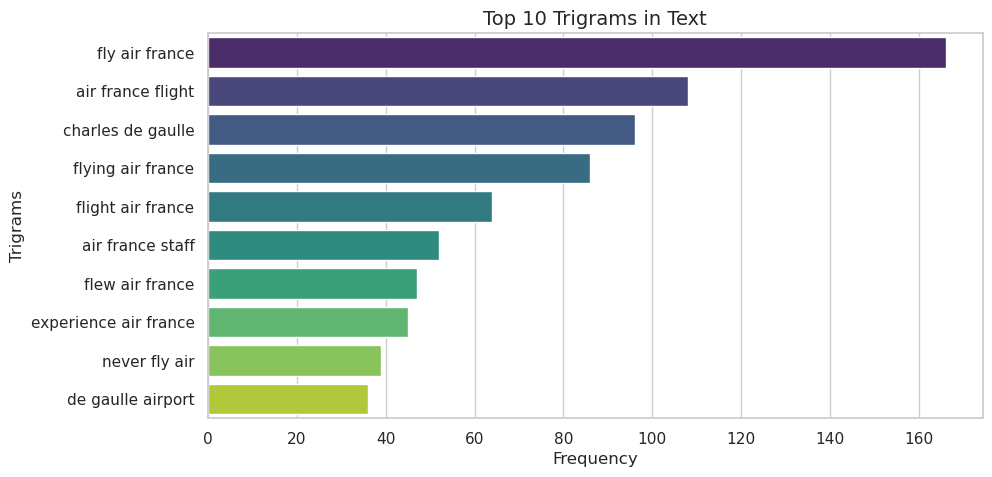

In [ ]:
# Plot top 10 trigrams in text
trigram_counts_text = Counter(trigrams_text).most_common(10)
trigrams, counts = zip(*trigram_counts_text)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(counts), y=list(trigrams), palette="viridis")
plt.title("Top 10 Trigrams in Text", fontsize=14)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Trigrams", fontsize=12)
plt.show()

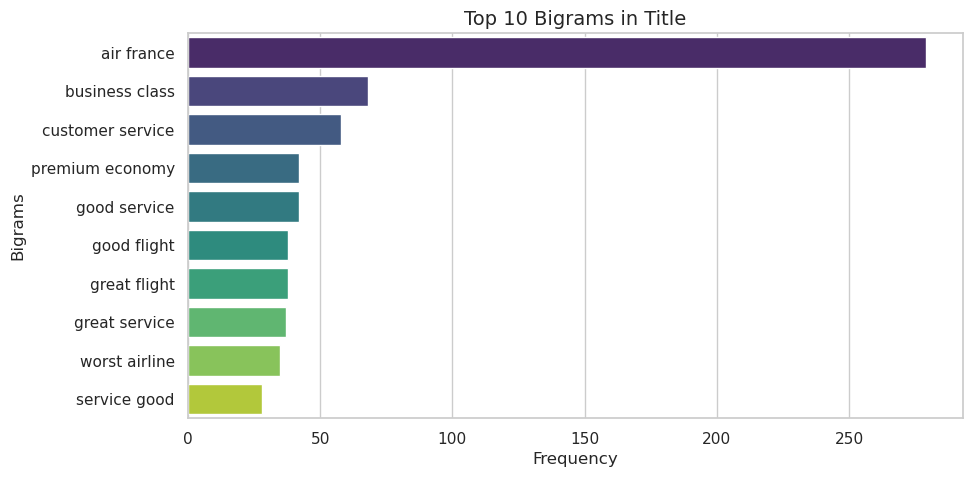

In [ ]:
# Plot top 10 bigrams in title
bigram_counts_title = Counter(bigrams_title).most_common(10)
bigrams, counts = zip(*bigram_counts_title)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(counts), y=list(bigrams), palette="viridis")
plt.title("Top 10 Bigrams in Title", fontsize=14)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Bigrams", fontsize=12)
plt.show()


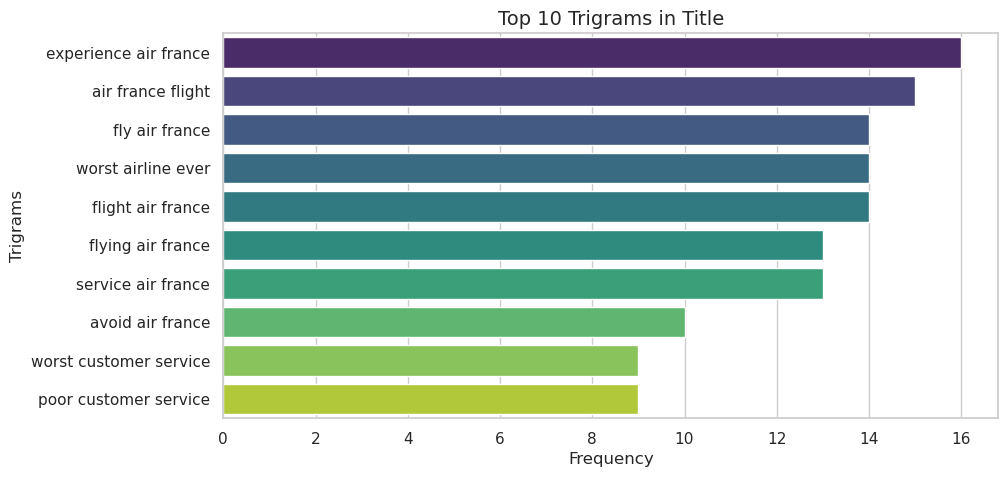

In [ ]:
# Plot top 10 trigrams in title
trigram_counts_title = Counter(trigrams_title).most_common(10)
trigrams, counts = zip(*trigram_counts_title)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(counts), y=list(trigrams), palette="viridis")
plt.title("Top 10 Trigrams in Title", fontsize=14)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Trigrams", fontsize=12)
plt.show()

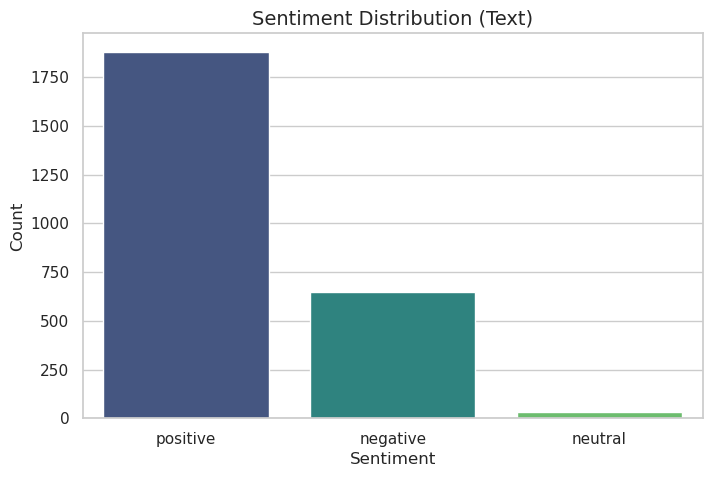

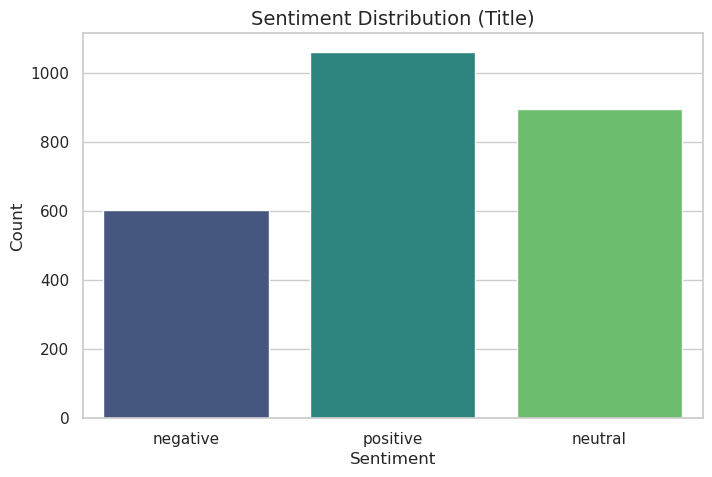

In [ ]:
# Categorize reviews based on polarity
df["sentiment_text"] = df["polarity_text"].apply(
    lambda x: "positive" if x > 0 else ("negative" if x < 0 else "neutral")
)
df["sentiment_title"] = df["polarity_title"].apply(
    lambda x: "positive" if x > 0 else ("negative" if x < 0 else "neutral")
)

# Plot sentiment distribution for text
plt.figure(figsize=(8, 5))
sns.countplot(x="sentiment_text", data=df, palette="viridis")
plt.title("Sentiment Distribution (Text)", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# Plot sentiment distribution for title
plt.figure(figsize=(8, 5))
sns.countplot(x="sentiment_title", data=df, palette="viridis")
plt.title("Sentiment Distribution (Title)", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

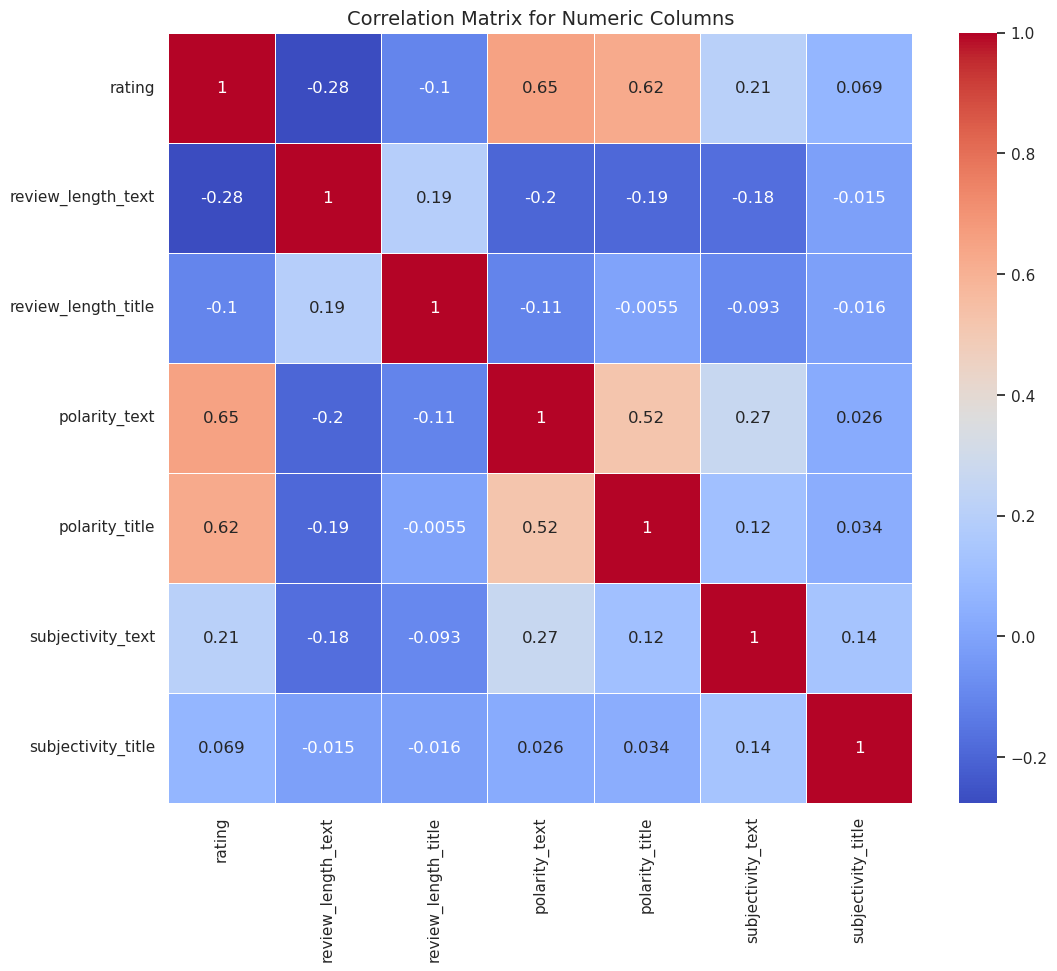

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix for Numeric Columns", fontsize=14)
plt.show()

In [85]:
df.to_csv(
    "/home/azureuser/cloudfiles/code/Users/oskar.wolf/nlp_air_france_reviews/data/interim/explored_reviews.csv",
    index=False,
)